IMPORTING AND SETUP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
%matplotlib inline

# Set visual style
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)


LOADING DATA

In [3]:
df = pd.read_csv("data/processed/TSLA_final.csv", parse_dates=['Date'])
print(f"Loaded {len(df)} days of data")
print(f"Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")
df.head(3)

Loaded 252 days of data
Date range: 2021-09-30 to 2022-09-29


,Date,Close,High,Low,Open,Volume,avg_sentiment,tweet_count,next_day_change
0,2021-09-30,258.493347,263.043335,258.333344,260.333344,53868000.0,0.130081,90.0,-0.000335
1,2021-10-01,258.406677,260.260010,254.529999,259.466675,51094200.0,0.113493,94.0,0.008140
2,2021-10-04,260.510010,268.989990,258.706665,265.500000,91449900.0,0.090901,119.0,-0.001203


PRICE SENTIMENTS TIME-SERIES

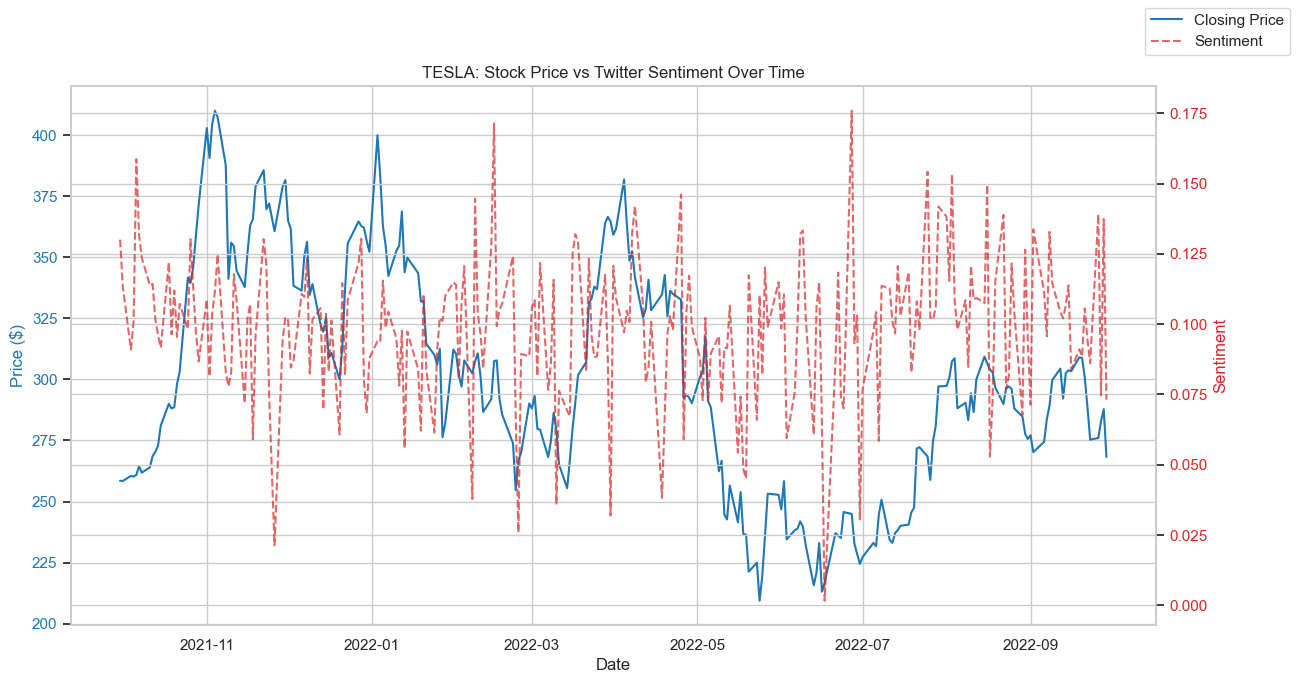

In [4]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Price plot
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
ax1.plot(df['Date'], df['Close'], color=color, label='Closing Price')
ax1.tick_params(axis='y', labelcolor=color)

# Sentiment plot
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Sentiment', color=color)
ax2.plot(df['Date'], df['avg_sentiment'], color=color, linestyle='--', alpha=0.7, label='Sentiment')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('TESLA: Stock Price vs Twitter Sentiment Over Time')
fig.legend(loc="upper right")
plt.show()

SENTIMENT DISTRIBUTION

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


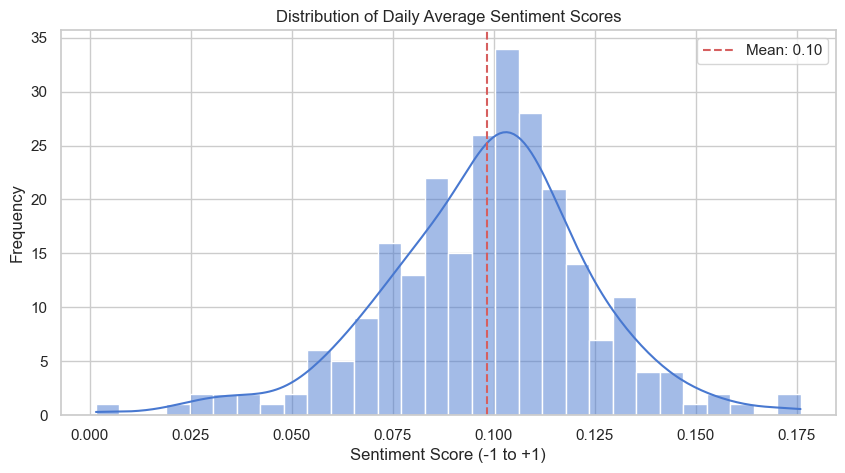

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df['avg_sentiment'], kde=True, bins=30)
plt.axvline(df['avg_sentiment'].mean(), color='r', linestyle='--', 
            label=f'Mean: {df["avg_sentiment"].mean():.2f}')
plt.title('Distribution of Daily Average Sentiment Scores')
plt.xlabel('Sentiment Score (-1 to +1)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

SENTIMENT Vs PRICE DISTRIBUTION

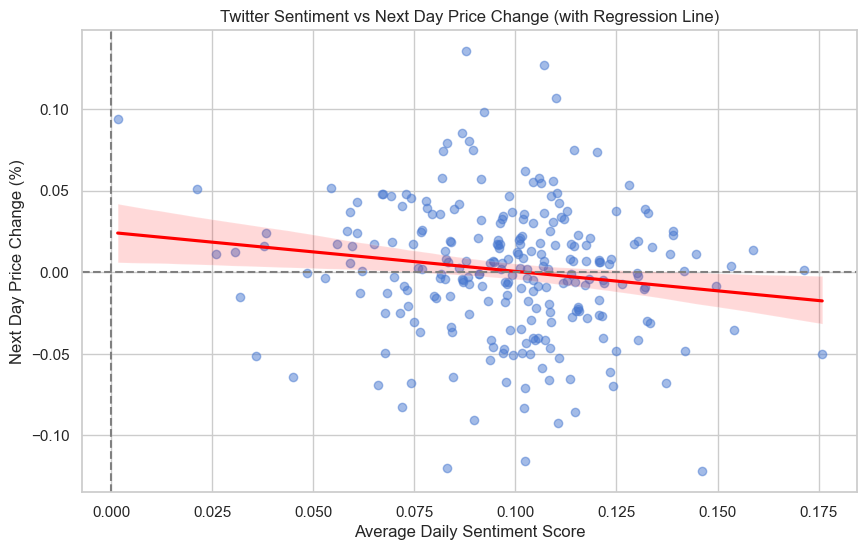

In [6]:
plt.figure(figsize=(10, 6))
sns.regplot(x='avg_sentiment', y='next_day_change', data=df, 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Twitter Sentiment vs Next Day Price Change (with Regression Line)')
plt.xlabel('Average Daily Sentiment Score')
plt.ylabel('Next Day Price Change (%)')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.show()

CORRELATION HEATMAP

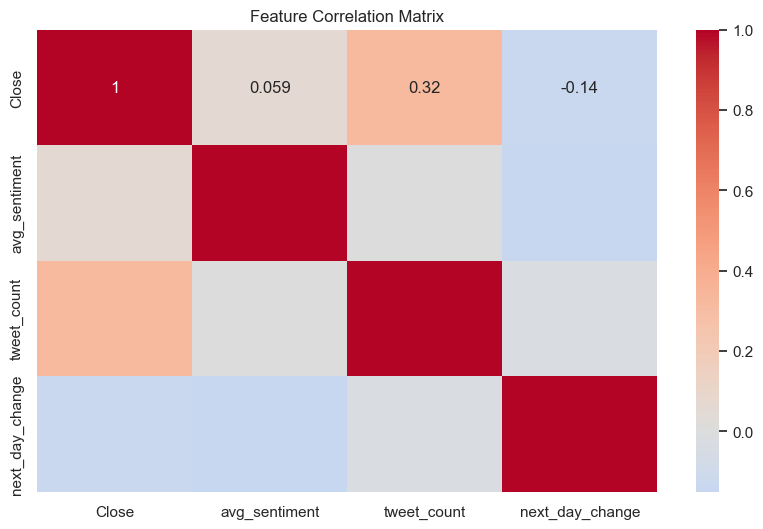

In [7]:
corr_matrix = df[['Close', 'avg_sentiment', 'tweet_count', 'next_day_change']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

TWEET VOLUME ANALYSIS

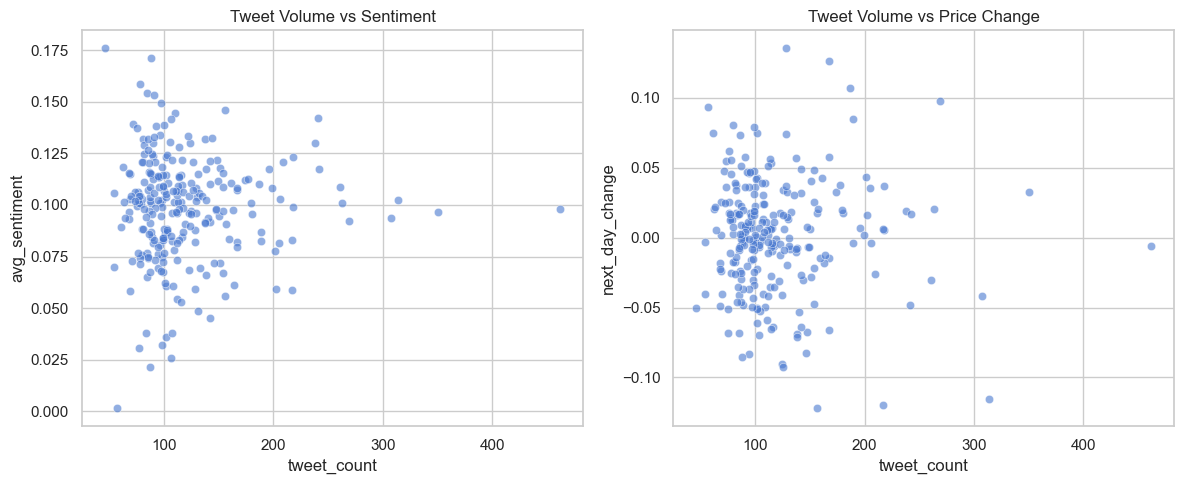

In [8]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='tweet_count', y='avg_sentiment', data=df, alpha=0.6)
plt.title('Tweet Volume vs Sentiment')

plt.subplot(1, 2, 2)
sns.scatterplot(x='tweet_count', y='next_day_change', data=df, alpha=0.6)
plt.title('Tweet Volume vs Price Change')
plt.tight_layout()
plt.show()

INTERACTIVE PLOLTS

In [9]:
fig = px.scatter(df, x='avg_sentiment', y='next_day_change', 
                 hover_data=['Date', 'Close'], 
                 title='Interactive: Sentiment vs Price Change')
fig.show()